In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
df['CryoSleep'] = df['CryoSleep'].astype(bool)
# df['Age'] = df['Age'].astype(int)
df['VIP'] = df['VIP'].astype(bool)

In [7]:
df.isna().sum()

,0
PassengerId,0
HomePlanet,201
CryoSleep,0
Cabin,199
Destination,182
Age,179
VIP,0
RoomService,181
FoodCourt,183
ShoppingMall,208


In [9]:
# prompt: in place of null value fill " " and in , Home planet column you fill simple imputer with mode value , cabin also imputer mode values,in age columns please used simple imputer with mean value and Room services fill with 0, food court also fill with 0 in null places ,Spa column also 0 ,vrdeck also 0

from sklearn.impute import SimpleImputer

# Fill null values with " " for object columns
df.fillna({
    'HomePlanet': ' ',
    'Cabin': ' ',
    'Destination': ' '
}, inplace=True)

# Fill null values in 'Age' with the mean
imputer_age = SimpleImputer(strategy='mean')
df['Age'] = imputer_age.fit_transform(df[['Age']])

# Fill null values in 'HomePlanet' with the mode
imputer_homeplanet = SimpleImputer(strategy='most_frequent')
#The following line has been updated to flatten the array returned by fit_transform
df['HomePlanet'] = imputer_homeplanet.fit_transform(df[['HomePlanet']]).flatten()

# Fill null values in 'Cabin' with the mode
imputer_cabin = SimpleImputer(strategy='most_frequent')
#The following line has been updated to flatten the array returned by fit_transform
df['Cabin'] = imputer_cabin.fit_transform(df[['Cabin']]).flatten()

# Fill null values in specified columns with 0
df.fillna({
    'RoomService': 0,
    'FoodCourt': 0,
    'Spa': 0,
    'VRDeck': 0
}, inplace=True)

In [10]:
df.isna().sum()

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,208


In [13]:
df.fillna({'ShoppingMall':0,'Name':" "},inplace=True)

In [15]:
df.isna().sum()

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0


In [ ]:
# prompt: create important plot for this dataset

import matplotlib.pyplot as plt
# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Age by HomePlanet
plt.figure(figsize=(10, 6))
sns.boxplot(x='HomePlanet', y='Age', data=df)
plt.title('Age Distribution by HomePlanet')
plt.show()

# Countplot of HomePlanet
plt.figure(figsize=(8, 6))
sns.countplot(x='HomePlanet', data=df)
plt.title('Count of Passengers by HomePlanet')
plt.show()

# Countplot of Transported
plt.figure(figsize=(8, 6))
sns.countplot(x='Transported', data=df)
plt.title('Count of Passengers by Transported')
plt.show()

# Pairplot
sns.pairplot(df[['Age', 'RoomService', 'FoodCourt', 'Spa', 'VRDeck', 'Transported']], hue='Transported')
plt.show()


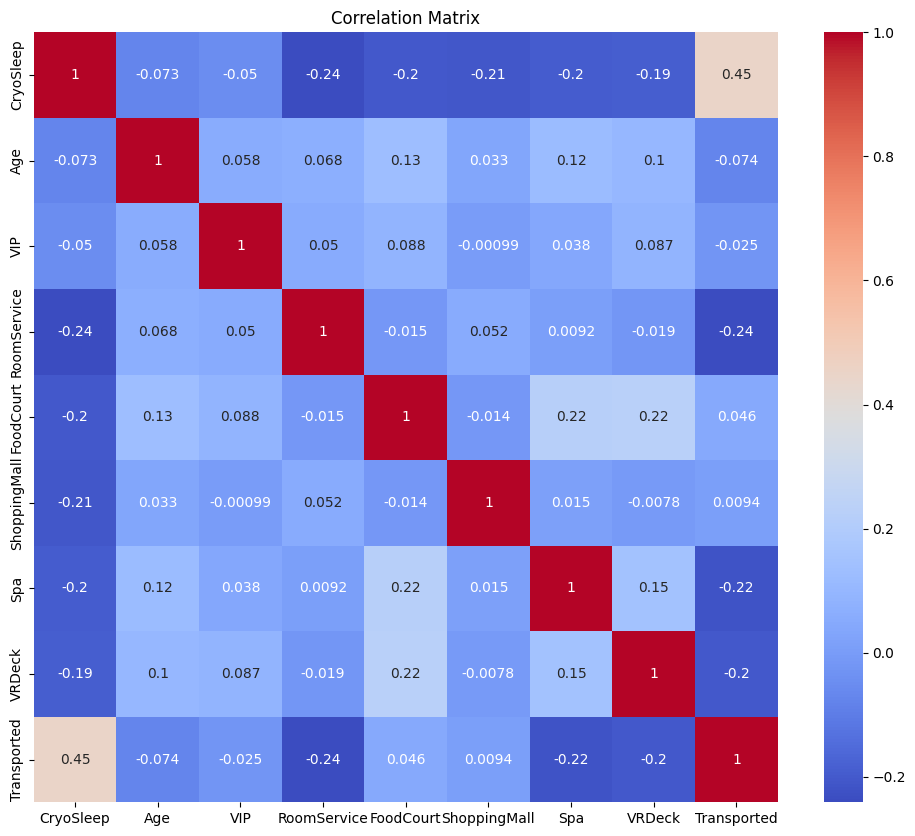

In [17]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only =True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


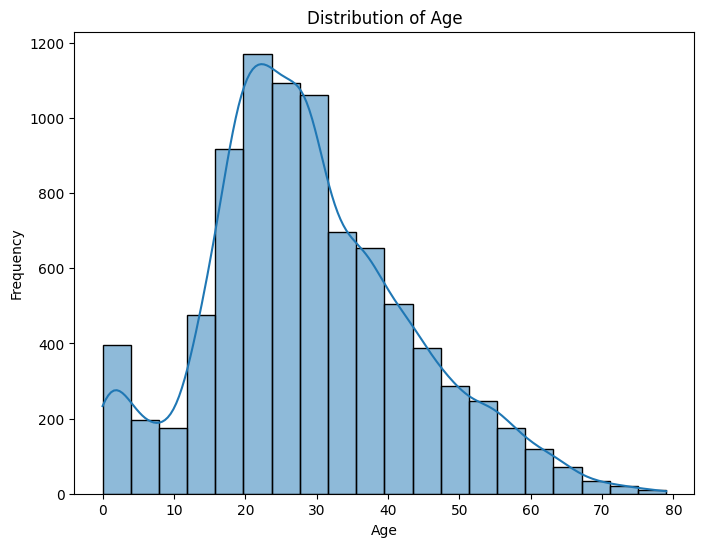

In [18]:
# Distribution of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


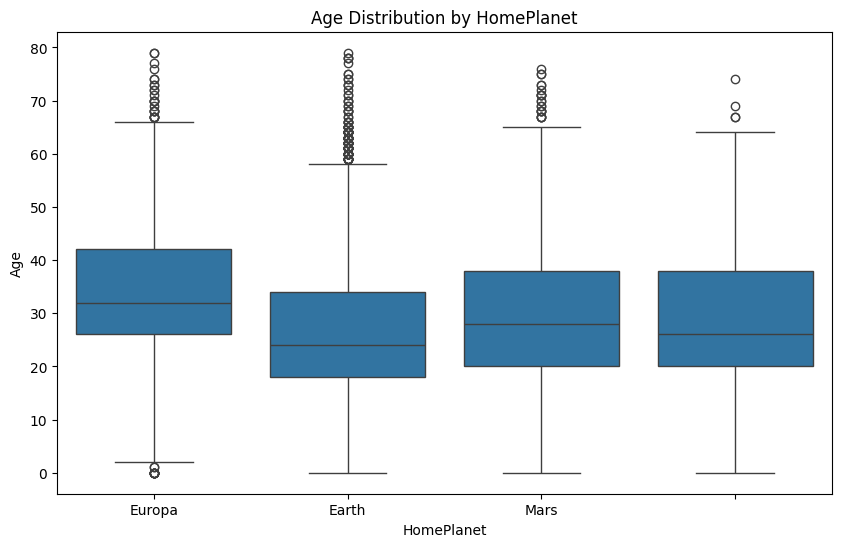

In [19]:
# Boxplot of Age by HomePlanet
plt.figure(figsize=(10, 6))
sns.boxplot(x='HomePlanet', y='Age', data=df)
plt.title('Age Distribution by HomePlanet')
plt.show()

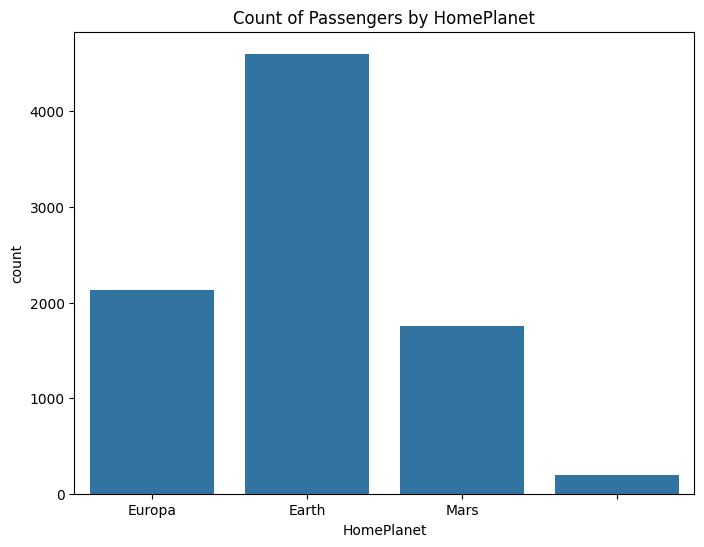

In [20]:
# Countplot of HomePlanet
plt.figure(figsize=(8, 6))
sns.countplot(x='HomePlanet', data=df)
plt.title('Count of Passengers by HomePlanet')
plt.show()

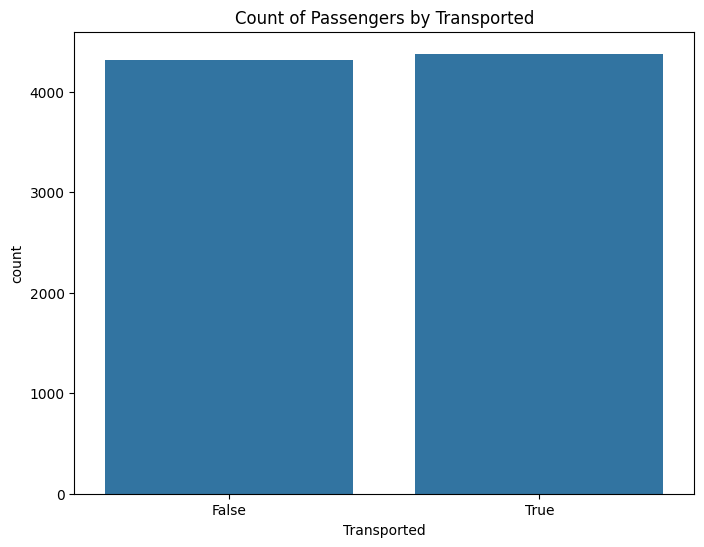

In [21]:
# Countplot of Transported
plt.figure(figsize=(8, 6))
sns.countplot(x='Transported', data=df)
plt.title('Count of Passengers by Transported')
plt.show()

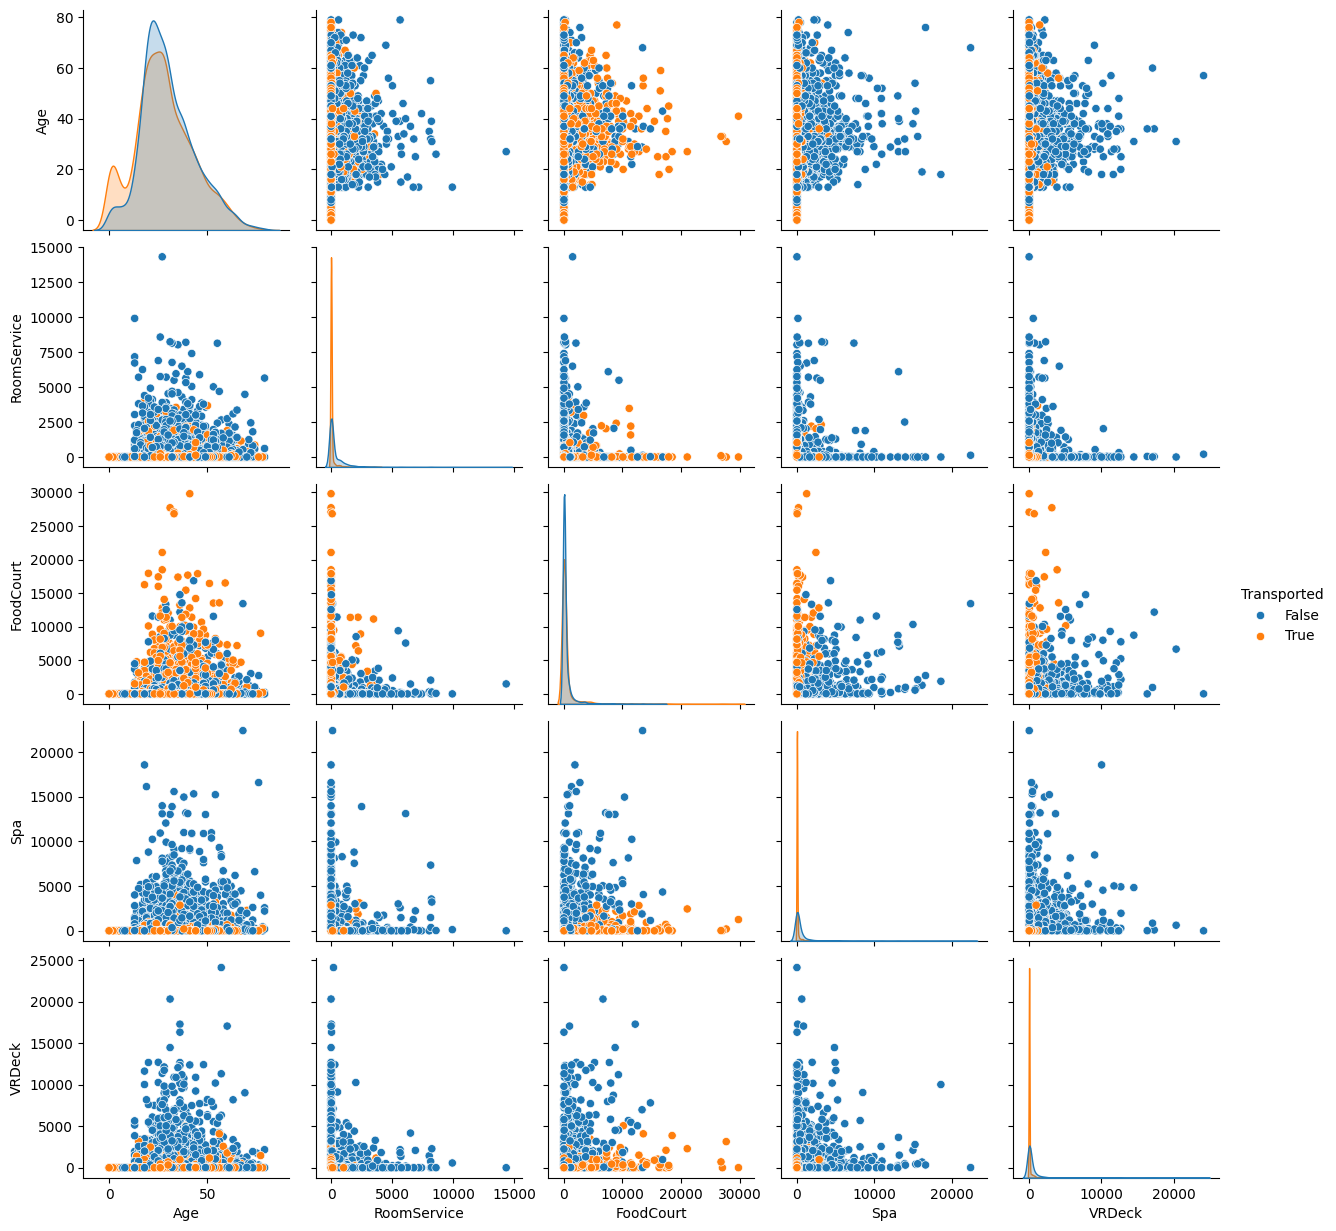

In [22]:
# Pairplot
sns.pairplot(df[['Age', 'RoomService', 'FoodCourt', 'Spa', 'VRDeck', 'Transported']], hue='Transported')
plt.show()

In [ ]:
# prompt: do further step and made a ML model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Select features and target variable
X = df[['HomePlanet', 'CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Destination']]
y = df['Transported']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define categorical features
categorical_features = ['HomePlanet', 'Destination']

# Create a ColumnTransformer to apply OneHotEncoder to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Create a pipeline with preprocessing and Logistic Regression model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [24]:
X = df[['HomePlanet', 'CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Destination']]
y = df['Transported']

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
categorical_features = ['HomePlanet', 'Destination']

In [27]:
# Create a ColumnTransformer to apply OneHotEncoder to categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

In [28]:
# Create a pipeline with preprocessing and Logistic Regression model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [29]:
# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['HomePlanet',
                                                   'Destination'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [30]:
y_pred = model.predict(X_test)

In [31]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7717078780908568

Classification Report:
               precision    recall  f1-score   support

       False       0.79      0.74      0.76       861
        True       0.76      0.80      0.78       878

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739


Confusion Matrix:
 [[638 223]
 [174 704]]


In [36]:
# Load the test dataset
test_df = pd.read_csv('test.csv')

# Impute missing values using the SimpleImputer
from sklearn.impute import SimpleImputer
import pandas as pd
imputer = SimpleImputer(strategy='most_frequent') # Replace with your desired strategy

# Fit and transform the imputer on your data
test_df = pd.DataFrame(imputer.fit_transform(test_df), columns=test_df.columns)

# Assuming `model` is your trained model
# Replace 'model' with the actual variable name of your model
predictions = model.predict(test_df)  # Pass the imputed DataFrame to model.predict

# Create a DataFrame with PassengerId and the Survived predictions
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Transported': predictions
})

# Save the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)

print("Submission file created successfully!")

Submission file created successfully!
